In [ ]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam,RMSprop,Lion,Lamb
from tensorflow.keras.callbacks import ReduceLROnPlateau



In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def extract_features_from_file(file_path):

    df = pd.read_csv(file_path, header=None)
    df = df.iloc[1:].transpose()  
    features = []
    for column in df.columns:
        coefficient_data = df[column]
        
       
        coefficient_data = coefficient_data.fillna(0)
    
        features.extend([
            coefficient_data.mean(),
            coefficient_data.std(),
            np.percentile(coefficient_data, 25),
            coefficient_data.median(),
            np.percentile(coefficient_data, 75),
            coefficient_data.max(),
            coefficient_data.min(),
            stats.kurtosis(coefficient_data),
            stats.skew(coefficient_data),
            stats.entropy(coefficient_data.value_counts(normalize=True)),  # Entropy
            np.sqrt(np.mean(coefficient_data**2)),  # Root Mean Square
            
        ])
    
    print(f"Feature extraction and scaling of {file_path} done")
    return features


In [ ]:
def load_and_preprocess_data(directory_path):
    data = []
    labels = []
    for label in os.listdir(directory_path):
        label_path = os.path.join(directory_path, label)
        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                features = extract_features_from_file(file_path)
                data.append(features)
                labels.append(label)
                
    # Convert data and labels to arrays
    data = np.array(data)
    # Print shape of the data
    print("Shape of dataset after feature extraction:", data.shape)

    return data, labels
data,labels =load_and_preprocess_data('Mfcc_training datset')



Feature extraction and scaling of Mfcc_training datset\Asha Bhosle\Aage Bhi Jaane Na - Waqt (1965) 320 Kbps.csv done
Feature extraction and scaling of Mfcc_training datset\Asha Bhosle\Aaiye Meharban - Howrah Bridge 1958 320 Kbps.csv done
Feature extraction and scaling of Mfcc_training datset\Asha Bhosle\Aaj Ki Raat Koi Aane Ko Hai - Anamika 320 Kbps.csv done
Feature extraction and scaling of Mfcc_training datset\Asha Bhosle\Aaj Koi Pyar Se - Sawan Ki Ghata 320 Kbps.csv done
Feature extraction and scaling of Mfcc_training datset\Asha Bhosle\Aaj Qayamat Ho Gai - Qayamat 320 Kbps.csv done
Feature extraction and scaling of Mfcc_training datset\Asha Bhosle\Aaja Aaja Sanam Rakhi Aur Hathkadi 320 Kbps.csv done
Feature extraction and scaling of Mfcc_training datset\Asha Bhosle\Aao Huzoor Tumko - Kismet 320 Kbps.csv done
Feature extraction and scaling of Mfcc_training datset\Asha Bhosle\Aao Na Gale Lag Jao Na - Mere Jeevan Saathi 320 Kbps.csv done
Feature extraction and scaling of Mfcc_training

asha = 0
bhav geet = 1
jana gana mana = 2
kishor da = 3
michael jackson = 4
lavni = 5

In [ ]:
data.shape

(608, 220)

In [6]:
labels= np.array(labels)
labels.shape

(608,)

In [7]:
def build_dense_model(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model



In [ ]:

X_train, y_train = data.copy(),labels.copy()


In [ ]:
y_train = y_train[:608].reshape(-1, 1)
# Combine `X_train` and `y_train` along the last axis
x_y = np.hstack((X_train, y_train))

# Shuffle the combined array
print(x_y)
np.random.shuffle(x_y)
x_y



[['-226.64940455561606' '56.37847587941111' '-249.60046' ...
  '10.523714602329814' '13.037416191557192' 'Asha Bhosle']
 ['-257.1164477907458' '63.58023530047273' '-275.218085' ...
  '9.90785253077827' '11.263734404173974' 'Asha Bhosle']
 ['-187.594066481613' '65.85296547796375' '-216.21999' ...
  '10.393451272115513' '8.80609286233409' 'Asha Bhosle']
 ...
 ['-226.1612263141829' '82.94257393947727' '-282.624735' ...
  '10.797861301392961' '7.198165978845693' 'Micheal Jackson']
 ['-104.9362742494978' '96.48779625540874' '-153.41112' ...
  '9.896115565227646' '8.089545589732445' 'Micheal Jackson']
 ['-145.75648380574646' '64.8254453753468' '-187.56892' ...
  '10.323260719657414' '7.5922995798794615' 'Micheal Jackson']]


array([['-122.54799014813683', '96.71696431897787',
        '-169.93221749999998', ..., '9.948714371386236',
        '8.914283362149718', 'Micheal Jackson'],
       ['-169.6394268481685', '62.642300437399044', '-212.10416', ...,
        '11.728666810995355', '7.747695570962417', 'Bhaav Geet'],
       ['-210.44400378129097', '113.2563934786346', '-209.7755', ...,
        '8.215165450515489', '9.17261668300187', 'Jana Gana Mana'],
       ...,
       ['-108.3079621933305', '81.84309947658744', '-146.27391', ...,
        '10.040981922785665', '10.279090126277598', 'Bhaav Geet'],
       ['-215.92425458065813', '74.44997734694469', '-254.03186', ...,
        '10.170359334706426', '9.87323539735178', 'Asha Bhosle'],
       ['-183.59149729350045', '83.58287169030515', '-222.32454', ...,
        '10.124870588257844', '14.63288993113383', 'Bhaav Geet']],
      dtype='<U32')

'Asha Bhosale': 0,
    'Bhaav Geet': 1,
    'Jana Gana Mana': 2,
    'Kishore Kumar': 3,
    'Michael Jackson': 5,
    'Lavni': 4

In [ ]:
X_train = x_y[:, :-1]  
y_train = x_y[:, -1]
label_map = {
    'Asha Bhosle': 0,
    'Bhaav Geet': 1,
    'Jana Gana Mana': 2,
    'Kishore kumar': 3,
    'Lavni': 4,
    'Micheal Jackson': 5

}



y_train = [label for label in y_train]  

mapped_labels = []
for label in y_train:
    if label in label_map:
        mapped_labels.append(label_map[label])
    else:
        print(f"Warning: Label '{label}' not found in label_map. Assigning default value.")
        mapped_labels.append(0)  
y_train = np.array(mapped_labels)

y_train = to_categorical(y_train)


In [11]:
print(y_train.shape)
y_train

(608, 6)


array([[0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [ ]:


print(y_train.shape)
x_train_flat =X_train.reshape((X_train.shape[0],X_train.shape[1]))
x_train_flat.shape

(608, 6)


(608, 220)

In [ ]:
model = build_dense_model(input_shape=(x_train_flat.shape[1],), num_classes=y_train.shape[1])
learning_rate = 0.00001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

In [14]:
print("Shape of X_train_flat:", x_train_flat.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train_flat: (608, 220)
Shape of y_train: (608, 6)


In [ ]:
x_train_flat = x_train_flat.astype("float32")
y_train = y_train.astype("int32") 

In [ ]:

history = model.fit(x_train_flat, y_train, epochs=200, validation_split=0.2, batch_size=32)


In [ ]:
model2 = build_dense_model(input_shape=(x_train_flat.shape[1],), num_classes=y_train.shape[1])
learning_rate = 0.00001
optimizer = RMSprop(learning_rate=learning_rate)
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 220)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        28,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,334 (216.15 KB)

 Trainable params: 55,334 (216.15 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:

history = model2.fit(x_train_flat, y_train, epochs=200, validation_split=0.2, batch_size=32)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1557 - loss: 39.8229 - val_accuracy: 0.1148 - val_loss: 3.3258
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2267 - loss: 9.3238 - val_accuracy: 0.2131 - val_loss: 2.2535
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1799 - loss: 6.6695 - val_accuracy: 0.1803 - val_loss: 1.9998
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2000 - loss: 3.9283 - val_accuracy: 0.2705 - val_loss: 1.7035
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2310 - loss: 3.2666 - val_accuracy: 0.2049 - val_loss: 1.8401
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2761 - loss: 2.1905 - val_accuracy: 0.4590 - val_loss: 1.5707
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3008 - loss: 2.0768 - val_accuracy: 0.5000 - val_loss: 1.5712
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2603 - loss: 2.0345 - val_accuracy: 0.4098 -

In [ ]:
model3 = build_dense_model(input_shape=(x_train_flat.shape[1],), num_classes=y_train.shape[1])
learning_rate = 0.00001
optimizer = Lion(learning_rate=learning_rate)
model3.compile(optimizer='lion', loss='categorical_crossentropy', metrics=['accuracy'])

model3.summary()

In [ ]:
history = model3.fit(x_train_flat, y_train, epochs=200, validation_split=0.2, batch_size=32)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

def extract_features_from_file_test(file_path):
    try:
        df = pd.read_csv(file_path, header=None, encoding='ISO-8859-1', on_bad_lines="skip", delimiter=",")
        
        df = df.transpose()
        
        features = []
        for column in df.columns:
            coefficient_data = df[column]
            features.extend([
                coefficient_data.mean(),
                coefficient_data.std(),
                np.percentile(coefficient_data, 25),
                coefficient_data.median(),
                np.percentile(coefficient_data, 75),
                coefficient_data.max(),
                coefficient_data.min(),
                stats.kurtosis(coefficient_data),
                stats.skew(coefficient_data),
                stats.entropy(coefficient_data.value_counts(normalize=True)),  # Entropy
                np.sqrt(np.mean(coefficient_data**2)),  # RMS
            ])
        
        
        features = np.array(features)
        print(f"Feature extraction of {file_path} done")
        return features

    except pd.errors.ParserError:
        print(f"Could not parse {file_path} due to inconsistent data structure.")
        return None


In [ ]:
test_directory = 'MFCC-files-v2-20241027'
results = {}

for file_name in os.listdir(test_directory):
    file_path = os.path.join(test_directory, file_name)
    x_test = extract_features_from_file_test(file_path)
    

    x_test = np.expand_dims(x_test, axis=0)
    print(x_test.shape)  
    probabilities = model2.predict(x_test)
    predicted_label = np.argmax(probabilities, axis=1)[0]
    predicted_probabilities = probabilities[0]
    results[file_name] = {
        'predicted_label': predicted_label,
        'probabilities': predicted_probabilities
    }


Feature extraction of MFCC-files-v2-20241027\01-MFCC.csv done
(1, 220)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Feature extraction of MFCC-files-v2-20241027\02-MFCC.csv done
(1, 220)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Feature extraction of MFCC-files-v2-20241027\03-MFCC.csv done
(1, 220)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Feature extraction of MFCC-files-v2-20241027\04-MFCC.csv done
(1, 220)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Feature extraction of MFCC-files-v2-20241027\05-MFCC.csv done
(1, 220)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Feature extraction of MFCC-files-v2-20241027\06-MFCC.csv done
(1, 220)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Feature extraction of MFCC-files-v2-20241027\07-MFCC.csv done
(1, 220)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Feature extraction of MFCC-files-v2-20241027\08-MFCC.csv done
(1, 220)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Feature extraction of MFCC-files-v2-20241027\09-MFCC.csv done
(1, 220)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Feature extraction 

In [23]:
for file_name, data in results.items():
    print(f"{file_name}:")
    print(f"  Predicted Label: {data['predicted_label']}")
    print(f"  Probabilities: {data['probabilities']}\n")


01-MFCC.csv:
  Predicted Label: 2
  Probabilities: [0.04232587 0.2987292  0.33293816 0.12826408 0.05912467 0.13861807]

02-MFCC.csv:
  Predicted Label: 2
  Probabilities: [9.8277542e-06 4.0834281e-03 9.9301964e-01 7.8510796e-04 7.8556710e-05
 2.0234208e-03]

03-MFCC.csv:
  Predicted Label: 5
  Probabilities: [4.7541109e-15 1.6344549e-09 3.2071759e-10 5.3493824e-11 9.4714278e-11
 1.0000000e+00]

04-MFCC.csv:
  Predicted Label: 4
  Probabilities: [0.25842032 0.00210767 0.05003594 0.0034637  0.6759412  0.01003112]

05-MFCC.csv:
  Predicted Label: 3
  Probabilities: [1.6905126e-03 1.6767140e-03 1.1582850e-03 9.9546742e-01 1.9344550e-06
 5.0620051e-06]

06-MFCC.csv:
  Predicted Label: 0
  Probabilities: [6.4950287e-01 1.7491456e-03 1.9986864e-02 7.7928491e-03 3.2042113e-01
 5.4718321e-04]

07-MFCC.csv:
  Predicted Label: 2
  Probabilities: [0.15821163 0.17935811 0.3081052  0.08652181 0.20233469 0.06546859]

08-MFCC.csv:
  Predicted Label: 5
  Probabilities: [6.1833758e-13 1.4878143e-08 4.83

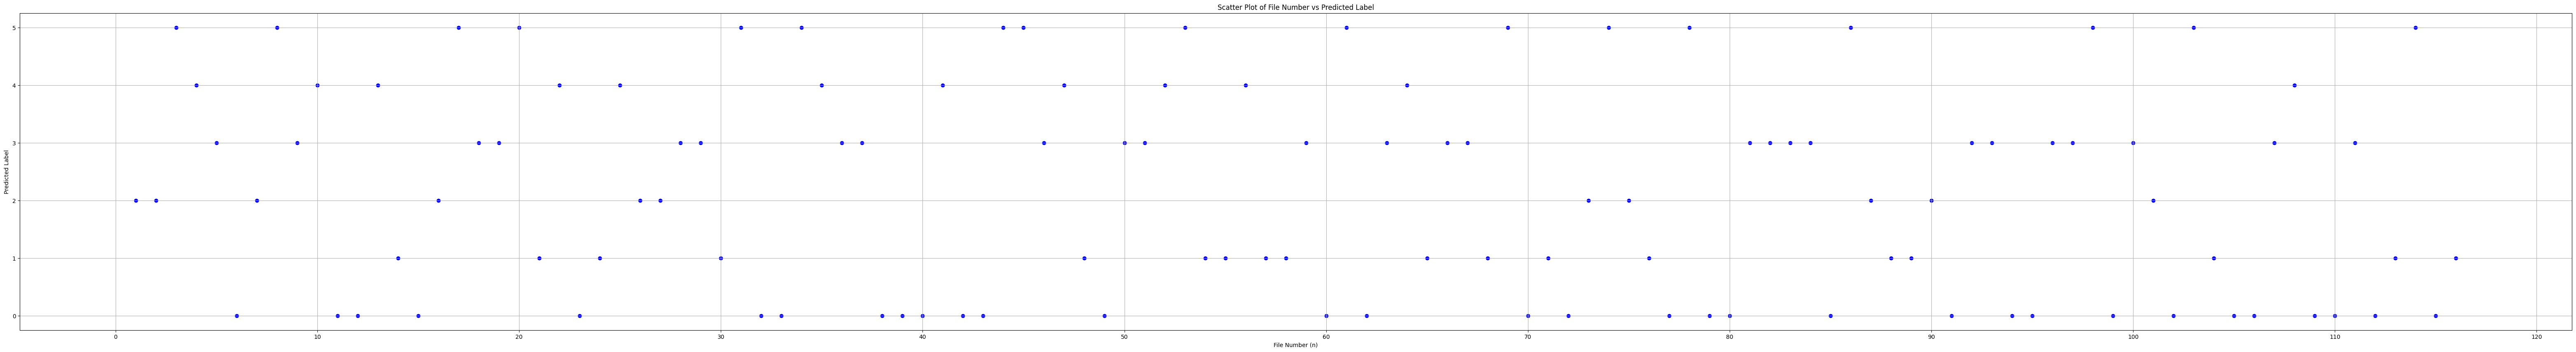

In [ ]:
import matplotlib.pyplot as plt 
file_numbers = [int(file_name.split('-')[0]) for file_name in results.keys()]
predicted_labels = [data['predicted_label'] for data in results.values()]

# Scatter plot
plt.figure(figsize=(80, 10))
plt.scatter(file_numbers, predicted_labels, color='b', marker='o')
plt.xlabel("File Number (n)")
plt.ylabel("Predicted Label")
plt.title("Scatter Plot of File Number vs Predicted Label")
plt.xticks(file_numbers)
plt.xticks(range(0, max(file_numbers) + 10, 10))  
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

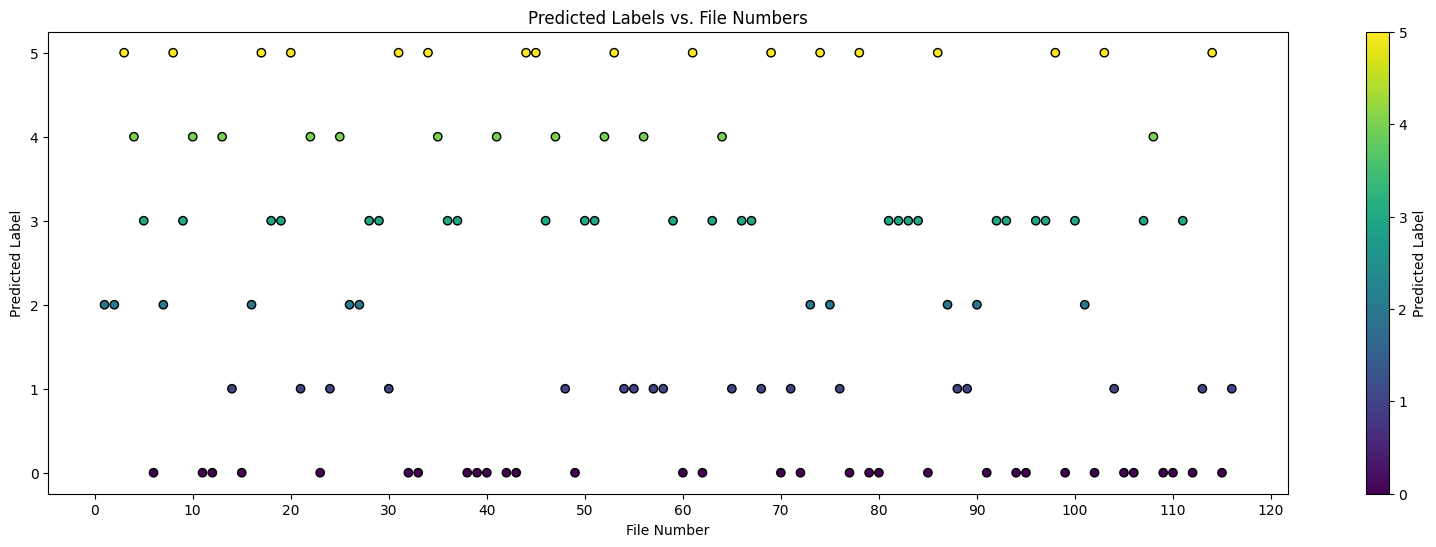

In [ ]:
plt.figure(figsize=(20, 6))
plt.scatter(file_numbers, predicted_labels, 
            c=predicted_labels, cmap='viridis', marker='o', edgecolor='k')
plt.xlabel("File Number")
plt.ylabel("Predicted Label")
plt.title("Predicted Labels vs. File Numbers")
plt.colorbar(label="Predicted Label")

plt.xticks(range(0, max(file_numbers) + 10, 10))
plt.show

In [28]:
reverse_label_map = {v: k for k, v in label_map.items()}

In [30]:
labeled_results = {file: {'predicted_label': reverse_label_map[data['predicted_label']], 'probabilities': data['probabilities']} for file, data in results.items()}

01-MFCC.csv: Predicted Label - Jana Gana Mana, Probabilities - [0.04232587 0.2987292  0.33293816 0.12826408 0.05912467 0.13861807]
02-MFCC.csv: Predicted Label - Jana Gana Mana, Probabilities - [9.8277542e-06 4.0834281e-03 9.9301964e-01 7.8510796e-04 7.8556710e-05
 2.0234208e-03]
03-MFCC.csv: Predicted Label - Micheal Jackson, Probabilities - [4.7541109e-15 1.6344549e-09 3.2071759e-10 5.3493824e-11 9.4714278e-11
 1.0000000e+00]
04-MFCC.csv: Predicted Label - Lavni, Probabilities - [0.25842032 0.00210767 0.05003594 0.0034637  0.6759412  0.01003112]
05-MFCC.csv: Predicted Label - Kishore kumar, Probabilities - [1.6905126e-03 1.6767140e-03 1.1582850e-03 9.9546742e-01 1.9344550e-06
 5.0620051e-06]
06-MFCC.csv: Predicted Label - Asha Bhosle, Probabilities - [6.4950287e-01 1.7491456e-03 1.9986864e-02 7.7928491e-03 3.2042113e-01
 5.4718321e-04]
07-MFCC.csv: Predicted Label - Jana Gana Mana, Probabilities - [0.15821163 0.17935811 0.3081052  0.08652181 0.20233469 0.06546859]
08-MFCC.csv: Predic

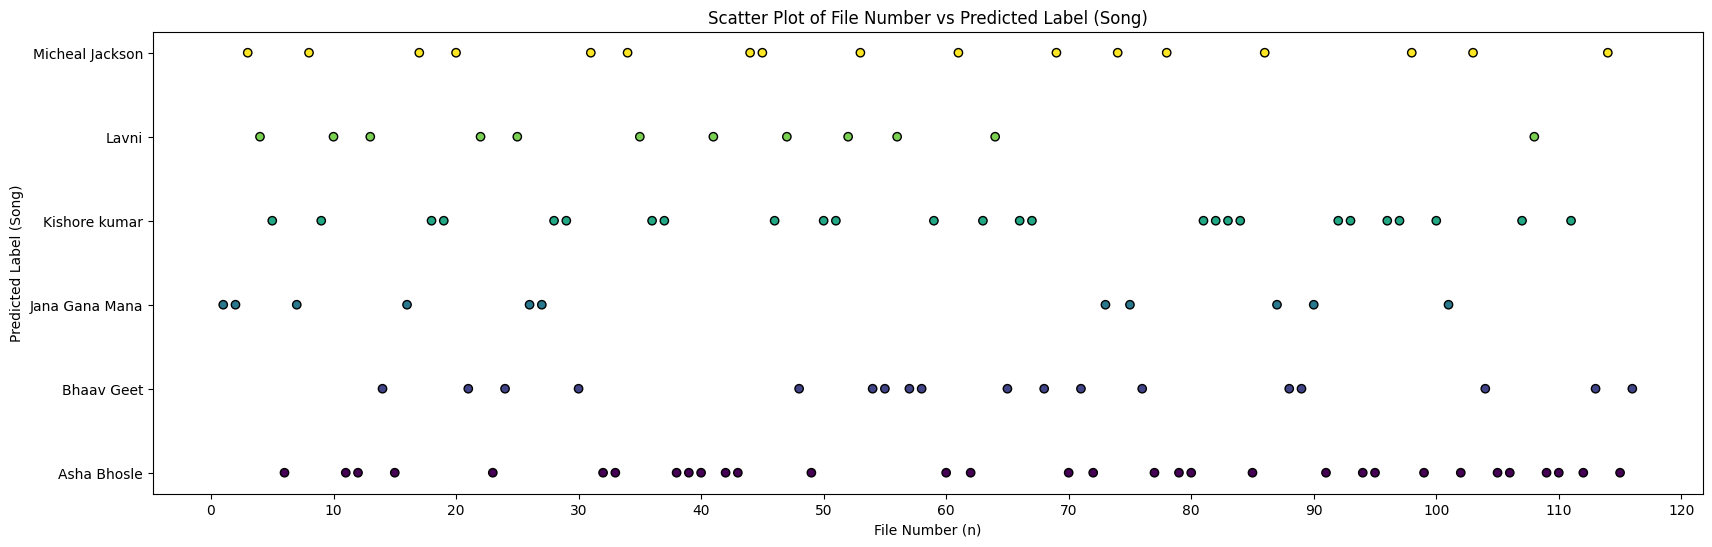

In [ ]:
for file_name, data in labeled_results.items():
    print(f"{file_name}: Predicted Label - {data['predicted_label']}, Probabilities - {data['probabilities']}")

file_numbers = [int(file_name.split('-')[0]) for file_name in labeled_results.keys()]
predicted_labels = [label_map[data['predicted_label']] for data in labeled_results.values()]

plt.figure(figsize=(20,6))

plt.scatter(file_numbers, predicted_labels, 
            c=predicted_labels, cmap='viridis', marker='o', edgecolor='k')
plt.xlabel("File Number (n)")
plt.ylabel("Predicted Label (Song)")
plt.title("Scatter Plot of File Number vs Predicted Label (Song)")
plt.xticks(file_numbers)
plt.xticks(range(0, max(file_numbers) + 10, 10))
plt.yticks(list(label_map.values()), list(label_map.keys())) 
plt.show()

In [ ]:
label_top_files = {label: [] for label in label_map.keys()}

for file_name, data in labeled_results.items():
    label = data['predicted_label']
    max_prob = max(data['probabilities'])  
    label_top_files[label].append((file_name, max_prob))

In [36]:
label_top_files

{'Asha Bhosle': [('06-MFCC.csv', 0.6495029),
  ('102-MFCC.csv', 0.9234652),
  ('105-MFCC.csv', 0.54315436),
  ('106-MFCC.csv', 0.8672886),
  ('109-MFCC.csv', 0.4795615),
  ('11-MFCC.csv', 0.75003785),
  ('110-MFCC.csv', 0.8079299),
  ('112-MFCC.csv', 0.6933528),
  ('115-MFCC.csv', 0.88220596),
  ('12-MFCC.csv', 0.31788373),
  ('15-MFCC.csv', 0.57680875),
  ('23-MFCC.csv', 0.7302246),
  ('32-MFCC.csv', 0.5738796),
  ('33-MFCC.csv', 0.90364736),
  ('38-MFCC.csv', 0.68848044),
  ('39-MFCC.csv', 0.7909123),
  ('40-MFCC.csv', 0.9618707),
  ('42-MFCC.csv', 0.84460205),
  ('43-MFCC.csv', 0.58718157),
  ('49-MFCC.csv', 0.76194596),
  ('60-MFCC.csv', 0.8697038),
  ('62-MFCC.csv', 0.86407584),
  ('70-MFCC.csv', 0.87037176),
  ('72-MFCC.csv', 0.5441827),
  ('77-MFCC.csv', 0.7307024),
  ('79-MFCC.csv', 0.9742485),
  ('80-MFCC.csv', 0.7407227),
  ('85-MFCC.csv', 0.73490804),
  ('91-MFCC.csv', 0.7704363),
  ('94-MFCC.csv', 0.77031815),
  ('95-MFCC.csv', 0.64564925),
  ('99-MFCC.csv', 0.57470024)],
 

In [37]:

for label in label_top_files:
    label_top_files[label] = sorted(label_top_files[label], key=lambda x: x[1], reverse=True)[:5]


In [38]:
label_top_files

{'Asha Bhosle': [('79-MFCC.csv', 0.9742485),
  ('40-MFCC.csv', 0.9618707),
  ('102-MFCC.csv', 0.9234652),
  ('33-MFCC.csv', 0.90364736),
  ('115-MFCC.csv', 0.88220596)],
 'Bhaav Geet': [('55-MFCC.csv', 0.99993014),
  ('88-MFCC.csv', 0.99972194),
  ('48-MFCC.csv', 0.99693465),
  ('65-MFCC.csv', 0.9950669),
  ('21-MFCC.csv', 0.9950492)],
 'Jana Gana Mana': [('02-MFCC.csv', 0.99301964),
  ('16-MFCC.csv', 0.98549277),
  ('87-MFCC.csv', 0.952534),
  ('75-MFCC.csv', 0.9240806),
  ('90-MFCC.csv', 0.8682872)],
 'Kishore kumar': [('59-MFCC.csv', 0.99994004),
  ('84-MFCC.csv', 0.99982697),
  ('09-MFCC.csv', 0.99981624),
  ('46-MFCC.csv', 0.9998005),
  ('51-MFCC.csv', 0.99970204)],
 'Lavni': [('47-MFCC.csv', 0.994833),
  ('10-MFCC.csv', 0.9739629),
  ('35-MFCC.csv', 0.7887029),
  ('04-MFCC.csv', 0.6759412),
  ('64-MFCC.csv', 0.6220926)],
 'Micheal Jackson': [('03-MFCC.csv', 1.0),
  ('08-MFCC.csv', 1.0),
  ('103-MFCC.csv', 1.0),
  ('114-MFCC.csv', 1.0),
  ('20-MFCC.csv', 1.0)]}

In [ ]:
for label, files in label_top_files.items():
    print(f"Top 5 MFCC files with the highest probability for label '{label}':")
    for file_name, prob in files:
        print(f"  {file_name}: Probability = {prob}")
    print("\n")

Top 5 MFCC files with the highest probability for label 'Asha Bhosle':
  79-MFCC.csv: Probability = 0.9742485284805298
  40-MFCC.csv: Probability = 0.9618706703186035
  102-MFCC.csv: Probability = 0.9234651923179626
  33-MFCC.csv: Probability = 0.9036473631858826
  115-MFCC.csv: Probability = 0.8822059631347656


Top 5 MFCC files with the highest probability for label 'Bhaav Geet':
  55-MFCC.csv: Probability = 0.9999301433563232
  88-MFCC.csv: Probability = 0.9997219443321228
  48-MFCC.csv: Probability = 0.9969346523284912
  65-MFCC.csv: Probability = 0.9950668811798096
  21-MFCC.csv: Probability = 0.9950491786003113


Top 5 MFCC files with the highest probability for label 'Jana Gana Mana':
  02-MFCC.csv: Probability = 0.9930196404457092
  16-MFCC.csv: Probability = 0.9854927659034729
  87-MFCC.csv: Probability = 0.952534019947052
  75-MFCC.csv: Probability = 0.9240806102752686
  90-MFCC.csv: Probability = 0.868287205696106


Top 5 MFCC files with the highest probability for label 'Ki